In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Ensure plots are displayed in Jupyter Notebook
%matplotlib inline

In [2]:
# Load Iris dataset
iris = datasets.load_iris()
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
# Show top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
# Print all feature names
print("Feature Names:", df.columns.tolist())
print("Total Rows in Dataset:", df.shape)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
Total Rows in Dataset: (150, 5)


In [7]:
# Define Cost Function (Mean Squared Error)
def cost_function(y_actual, y_predicted):
    m = len(y_actual)
    cost = (1 / (2 * m)) * np.sum((y_actual - y_predicted) ** 2)
    return cost

In [14]:
# Selecting features (predictors) and target (response variable)
X = df.drop(columns=['sepal length (cm)'])  # Predicting 'sepal length (cm)'
y = df['sepal length (cm)']

In [15]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 0.1000
R² Score: 0.8551


In [18]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [20]:
# Compute Cost (MSE)
cost = cost_function(y_test, y_pred)
print(f"Cost Function Value (MSE): {cost:.4f}")

Cost Function Value (MSE): 0.0500


In [21]:
# Train-test split for classification
X_class = df.drop(columns=['target'])
y_class = df['target']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [22]:
# Train an SVM classifier
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_class, y_train_class)

SVC(kernel='linear', probability=True)

In [23]:
# Predictions
y_pred_class = clf.predict(X_test_class)

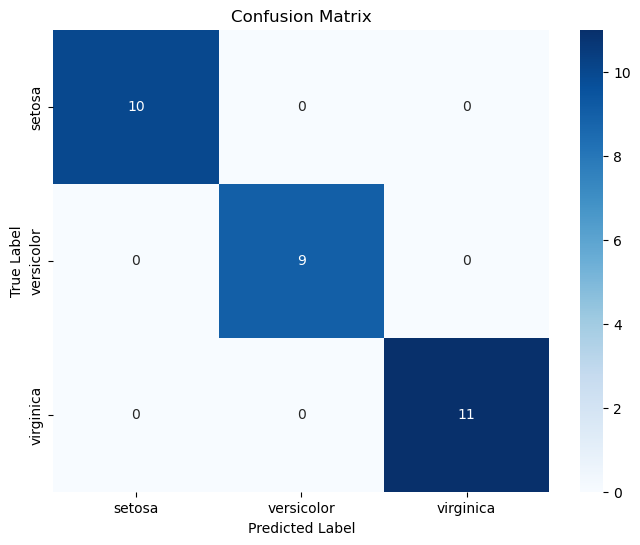

In [24]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Print classification report
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# Compute and print individual evaluation metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy Score: {accuracy:.2f}")
print(f"Precision Score: {precision:.2f}")
print(f"Recall Score: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.00
Precision Score: 1.00
Recall Score: 1.00
F1 Score: 1.00


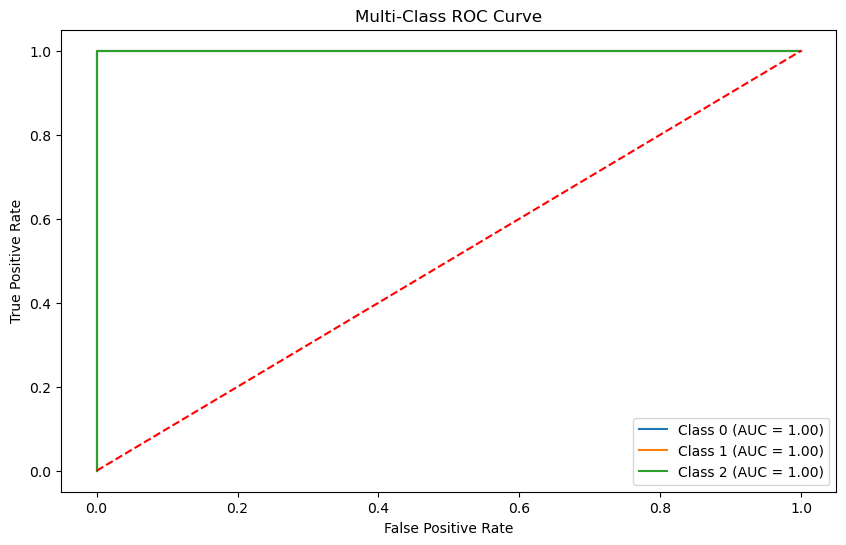

In [26]:
# Convert labels to binary format for multi-class ROC
y_test_bin = label_binarize(y_test_class, classes=np.unique(y_class))
y_prob = clf.decision_function(X_test_class)

# Compute ROC Curve for each class
plt.figure(figsize=(10, 6))
for i in range(len(iris.target_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

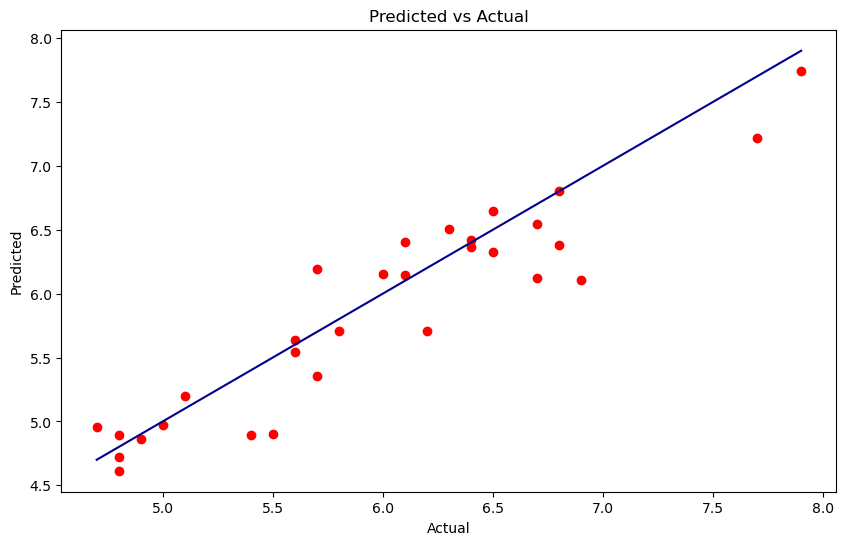

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1.0, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='darkblue')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()